# State Space 

### Calculate the size of state space


In [1]:
import math

In [2]:
def size_ss_round(n,k):
    sum1=math.factorial(n)/math.factorial(n-k)
    
    for i in range (1,k):
        subsum=math.factorial(n)/math.factorial(n-k+1)
        subsum*=(k-1)
        subsum*=math.factorial(k-2)/(math.factorial(i-1)*math.factorial(k-1-i))
        sum1+=subsum
    return sum1


print(size_ss_round(3,3))    

30.0


In [3]:
def size_statespace(n):
    sum_size=1
    for i in range (1,n+1):
        sum_size+=size_ss_round(n,i)
    return sum_size
print(size_statespace(3))

43.0


In [4]:
for i in range(1,11):
    print(i,'{0:20,}'.format(int(size_statespace(i))))

1                    2
2                    7
3                   43
4                  405
5                4,971
6               72,643
7            1,212,555
8           22,639,305
9          466,785,523
10       10,531,135,191


In [5]:
import itertools as it
gifts = [1,2,3,4]
p = list(it.permutations(gifts,2))
print(p)
#(1,2) -> '[1,2,0,0]'

[(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4), (4, 1), (4, 2), (4, 3)]



## Generate function: The function generate a list of possible states for n,k 
Parameter: <br /> 
n:total number of gifts  <br /> 
k:round k

In [6]:
import itertools as it
def Generate_end(n,k): #n:total number of gifts k:round k
    giftvalue=list(range(1,n+1))
    plist=list(it.permutations(giftvalue,k))
    totallist=[]
    for l  in plist:
        giftlist=list(l)
        for i in range (k,n):
            giftlist.append(0)
        totallist.append(str(giftlist))
    return totallist
print(Generate_end(3,2))
        


['[1, 2, 0]', '[1, 3, 0]', '[2, 1, 0]', '[2, 3, 0]', '[3, 1, 0]', '[3, 2, 0]']


In [7]:
def Generate_inner(n,k):
    totallist=[]
    for placeforzero in range(0,k-1):
        giftvalue=list(range(1,n+1))
        plist=list(it.permutations(giftvalue,k-1))
        for l  in plist:          
            for starnum in range (1,k):
                giftlist=list(l)
                starlist=list(it.combinations(range(len(giftlist)-1),starnum-1))
                #print('star',starlist)
                for starlist in starlist:
                    giftlist=list(l)
                    kvalue=str(giftlist.pop(k-2))+'*'
                    for starindex in range(0,starnum-1):
                        giftindex=starlist[starindex]
                        giftlist[giftindex]=str(giftlist[giftindex])+'*'

                    giftlist.insert(placeforzero,0)
                    giftlist.insert(k-1,kvalue)
                    for r in range (k,n):
                        giftlist.append(0)
                    #print(starnum, giftlist)
                    gift=str(giftlist)
                    gift= gift.replace("'","")
                    
                    totallist.append(gift)
                        
    return totallist
print(Generate_inner(3,3))
print(len(Generate_inner(3,3)))
print(Generate_inner(3,2))

['[0, 1, 2*]', '[0, 1*, 2*]', '[0, 1, 3*]', '[0, 1*, 3*]', '[0, 2, 1*]', '[0, 2*, 1*]', '[0, 2, 3*]', '[0, 2*, 3*]', '[0, 3, 1*]', '[0, 3*, 1*]', '[0, 3, 2*]', '[0, 3*, 2*]', '[1, 0, 2*]', '[1*, 0, 2*]', '[1, 0, 3*]', '[1*, 0, 3*]', '[2, 0, 1*]', '[2*, 0, 1*]', '[2, 0, 3*]', '[2*, 0, 3*]', '[3, 0, 1*]', '[3*, 0, 1*]', '[3, 0, 2*]', '[3*, 0, 2*]']
24
['[0, 1*, 0]', '[0, 2*, 0]', '[0, 3*, 0]']


In [8]:
def Generate(n,k):
    list1=Generate_inner(n,k)+Generate_end(n,k)
    return list1
print(len(Generate(4,4)))
print(len(Generate(4,3)))
print(len(Generate(4,2)))
print(len(Generate(4,1)))
print(len(Generate(4,1))+len(Generate(4,2))+len(Generate(4,3))+len(Generate(4,4))+1)
print(len(Generate(5,1))+len(Generate(5,2))+len(Generate(5,3))+len(Generate(5,4))+len(Generate(5,5))+1)

312
72
16
4
405
4971


## Compute number of trajectory
n:total number of gifts, n>=1


In [11]:
def size_trajectory(n):
    size=n
    prechoice=n
    for r in range (2,n+1):
        for i in range(r-1,0,-1):
            if i==r-1:
                choice=(n-r+1)*(r-i)
                choice+=(n-r+1)
            else:
                choice*=(r-i)
                choice+=(n-r+1)
        size= choice*prechoice        
        prechoice=size
    return size
print(size_trajectory(1))
print(size_trajectory(2))
print(size_trajectory(3))

1
4
60


In [10]:
print(size_trajectory(4))
print(size_trajectory(5))
print(size_trajectory(6))
print(size_trajectory(7))

3840
1248000
2441088000
33440464512000


## Generate Actions(s): Return a list of all actions and a list of action outcome.


In [11]:
from fractions import Fraction
def GenerateActions(s):
    actionlist=[]
    aolist=[]
    #transfer the state from a string to a list->easy to write code
    zeronum=s.count('0',0,len(s))
    s=s.replace('[','')
    s=s.replace(']','')
    s=s.replace(' ','')
    slist=s.split(',')
    
    # a list of value of gift which can be open
    giftlist=list(range(1,len(slist)+1))
    #a list of value of gift which can be steal
    steallist=[]
    
    #find 0's position
    if zeronum==0:
        return aolist,actionlist
    index1=slist.index('0')
    actionlist.append('O('+str(index1+1)+')')
    if zeronum!=1:
        index2=slist.index('0',index1+1,len(slist))
    
    roundk=0 #know which round of game
    for  i in range(len(slist)):
        if slist[i]!='0':
            roundk=i+1
            value=slist[i].replace('*','')
            value=int(value)
            giftlist.remove(value)
            if not('*' in slist[i]):
                steallist.append(i)
    wrappedprob=Fraction(1,len(giftlist))
    for l in giftlist:
        aolist.append('O('+str(index1+1)+','+str(l)+','+str(wrappedprob)+')')
    if len(steallist)!=0:
        stealprob=1/len(steallist)
        for steal in steallist:
            actionlist.append('S('+str(index1+1)+','+str(slist[steal])+','+str(steal+1)+')')
            aolist.append('S('+str(index1+1)+','+str(slist[steal])+','+str(steal+1)+','+'1.0'+')')

    return aolist,actionlist


In [12]:

aolist,actionlist=GenerateActions('[1,2,0,0]')
print('Action Outcome list is: ',aolist,' Action list is: ',actionlist)
aolist,actionlist=GenerateActions('[1*,0,3*,0]')
print('Action Outcome list is: ',aolist,' Action list is: ',actionlist)
aolist,actionlist=GenerateActions('[1,2,0,4*]')
print('Action Outcome list is: ',aolist,' Action list is: ',actionlist)
aolist,actionlist=GenerateActions('[3,2,1,0]')
print('Action Outcome list is: ',aolist,' Action list is: ',actionlist)

Action Outcome list is:  ['O(3,3,1/2)', 'O(3,4,1/2)', 'S(3,1,1,1.0)', 'S(3,2,2,1.0)']  Action list is:  ['O(3)', 'S(3,1,1)', 'S(3,2,2)']
Action Outcome list is:  ['O(2,2,1/2)', 'O(2,4,1/2)']  Action list is:  ['O(2)']
Action Outcome list is:  ['O(3,3,1)', 'S(3,1,1,1.0)', 'S(3,2,2,1.0)']  Action list is:  ['O(3)', 'S(3,1,1)', 'S(3,2,2)']
Action Outcome list is:  ['O(4,4,1)', 'S(4,3,1,1.0)', 'S(4,2,2,1.0)', 'S(4,1,3,1.0)']  Action list is:  ['O(4)', 'S(4,3,1)', 'S(4,2,2)', 'S(4,1,3)']


## Next State: Return next state for taking action outcome ao in state s

In [13]:
def NextState(s,ao):
    s=s.replace('[','')
    s=s.replace(']','')
    slist=s.split(',')
    
    if ao[0]=='O':
        ao=ao.replace('O','')
        ao=ao.replace('(','')
        ao=ao.replace(')','')
        aolist=ao.split(',')
        slist[int(aolist[0])-1]=aolist[1]
        slist=str(slist).replace("'",'')
        slist=slist.replace('*','')
    else:
        ao=ao.replace('S','')
        ao=ao.replace('(','')
        ao=ao.replace(')','')
        aolist=ao.split(',')
        slist[int(aolist[0])-1]=aolist[1]+'*'
        slist[int(aolist[2])-1]=0
    
    slist=str(slist).replace("'",'')
    slist=slist.replace(" ",'')
    return slist


In [14]:
print(NextState('[1,0,3*,0]','O(2,2,1/2)'))
print(NextState('[1,2,0,0]','S(3,1,1,1.0)'))

[1,2,3,0]
[0,2,1*,0]


## GenerateTrajectories(s):return a list of trajectories in state s.

In [15]:
def GenerateTrajectory(s):
    aolist,actionlist=GenerateActions(s)
    trajectorieslist=[]
    if len(aolist)==0:
        trajectorieslist.append(s)
        return trajectorieslist
    else:
        for i in range(len(aolist)):
            nexts=NextState(s,aolist[i])
            
            tlist=GenerateTrajectory(nexts)
            
            for k in tlist:
                trajectorieslist.append(s+'->'+aolist[i]+'->'+k)
        
        return trajectorieslist

In [16]:
#print(GenerateTrajectory('[0,0]'))
print(GenerateTrajectory('[0,0,0]'))
print(GenerateTrajectory('[0,0,0,0]'))

['[0,0,0]->O(1,1,1/3)->[1,0,0]->O(2,2,1/2)->[1,2,0]->O(3,3,1)->[1,2,3]', '[0,0,0]->O(1,1,1/3)->[1,0,0]->O(2,2,1/2)->[1,2,0]->S(3,1,1,1.0)->[0,2,1*]->O(1,3,1)->[3,2,1]', '[0,0,0]->O(1,1,1/3)->[1,0,0]->O(2,2,1/2)->[1,2,0]->S(3,1,1,1.0)->[0,2,1*]->S(1,2,2,1.0)->[2*,0,1*]->O(2,3,1)->[2,3,1]', '[0,0,0]->O(1,1,1/3)->[1,0,0]->O(2,2,1/2)->[1,2,0]->S(3,2,2,1.0)->[1,0,2*]->O(2,3,1)->[1,3,2]', '[0,0,0]->O(1,1,1/3)->[1,0,0]->O(2,2,1/2)->[1,2,0]->S(3,2,2,1.0)->[1,0,2*]->S(2,1,1,1.0)->[0,1*,2*]->O(1,3,1)->[3,1,2]', '[0,0,0]->O(1,1,1/3)->[1,0,0]->O(2,3,1/2)->[1,3,0]->O(3,2,1)->[1,3,2]', '[0,0,0]->O(1,1,1/3)->[1,0,0]->O(2,3,1/2)->[1,3,0]->S(3,1,1,1.0)->[0,3,1*]->O(1,2,1)->[2,3,1]', '[0,0,0]->O(1,1,1/3)->[1,0,0]->O(2,3,1/2)->[1,3,0]->S(3,1,1,1.0)->[0,3,1*]->S(1,3,2,1.0)->[3*,0,1*]->O(2,2,1)->[3,2,1]', '[0,0,0]->O(1,1,1/3)->[1,0,0]->O(2,3,1/2)->[1,3,0]->S(3,3,2,1.0)->[1,0,3*]->O(2,2,1)->[1,2,3]', '[0,0,0]->O(1,1,1/3)->[1,0,0]->O(2,3,1/2)->[1,3,0]->S(3,3,2,1.0)->[1,0,3*]->S(2,1,1,1.0)->[0,1*,3*]->O(1,2,1

In [17]:
print(len(GenerateTrajectory('[0,0,0,0]')))
print(len(GenerateTrajectory('[0,0,0,0,0]')))


3840
1248000


### Get Value for each state by using Dynamic Programming

In [17]:
def GetValue(s):
    aolist,actionlist=GenerateActions(s)
    statevalue={}
    policy={}
    if len(aolist)==0:
        s1=s.replace('[','')
        s1=s1.replace(']','')
        slist=s1.split(',')
        vlist=[]
        for i  in  slist:
            vlist.append(float(i))
            
        statevalue[s]=vlist
        return statevalue,policy
    else:
        #all action outcome
        personvalue=0
        si=s.replace('[','')
        si=si.replace(']','')
        sliststart=si.split(',')
        valueo=[]
        for k  in  range(len(sliststart)):
            valueo.append(0)
        
        for i in range(len(aolist)):           
            nexts=NextState(s,aolist[i])             
            svalue,policy1=GetValue(nexts) 
            statevalue.update(svalue)
            policy.update(policy1)
            value1=statevalue[nexts]
            if aolist[i][0]=='O':
                ao1=aolist[i].replace('O','')
                ao1=ao1.replace('(','')
                ao1=ao1.replace(')','')
                aolist1=ao1.split(',')
                fracvalue=aolist1[2].find('/')
                if fracvalue!=-1:
                    frac1=aolist1[2][0:fracvalue]
                    frac2=aolist1[2][fracvalue+1:len(aolist1[2])]
                    frac1=float(frac1)
                    frac2=float(frac2)
                    pro=frac1/frac2
                else:
                    pro=float(aolist1[2])
                for n  in  range(len(value1)):
                    valueo[n]+=value1[n]*pro
                #person make choice is  ao1[0]
                person_num=int(aolist1[0]) 
                if personvalue<valueo[person_num-1]:
                    personvalue=valueo[person_num-1]
                    statevalue[s]=valueo
                    policy[s]='O('+str(person_num)+')'
                    

            else:
                ao1=aolist[i].replace('S','')
                ao1=ao1.replace('(','')
                ao1=ao1.replace(')','')
                aolist1=ao1.split(',')
                person_num=int(aolist1[0])
                if personvalue<value1[person_num-1]:
                    personvalue=value1[person_num-1]
                    statevalue[s]=value1
                    policy[s]='S('+str(aolist1[0])+','+str(aolist1[1])+','+str(aolist1[2])+')'  
            
        
                
        
        return  statevalue,policy

In [18]:

statevalue,policy=GetValue('[0,0]')

print('State: ',statevalue)
print('policy: ',policy)

State:  {'[1,2]': [1.0, 2.0], '[1,0]': [1.0, 2.0], '[2,1]': [2.0, 1.0], '[0,1*]': [2.0, 1.0], '[0,0]': [1.0, 2.0], '[2,0]': [1.0, 2.0], '[0,2*]': [1.0, 2.0]}
policy:  {'[1,0]': 'O(2)', '[0,1*]': 'O(1)', '[0,0]': 'O(1)', '[2,0]': 'S(2,2,1)', '[0,2*]': 'O(1)'}


In [19]:

statevalue,policy=GetValue('[0,0,0]')

print('State: ',statevalue)
print('policy: ',policy)


State:  {'[1,2,3]': [1.0, 2.0, 3.0], '[1,2,0]': [1.0, 2.0, 3.0], '[3,2,1]': [3.0, 2.0, 1.0], '[0,2,1*]': [3.0, 2.0, 1.0], '[2,3,1]': [2.0, 3.0, 1.0], '[2*,0,1*]': [2.0, 3.0, 1.0], '[1,3,2]': [1.0, 3.0, 2.0], '[1,0,2*]': [1.0, 3.0, 2.0], '[3,1,2]': [3.0, 1.0, 2.0], '[0,1*,2*]': [3.0, 1.0, 2.0], '[1,0,0]': [1.0, 2.0, 3.0], '[1,3,0]': [1.0, 2.0, 3.0], '[0,3,1*]': [3.0, 2.0, 1.0], '[3*,0,1*]': [3.0, 2.0, 1.0], '[1,0,3*]': [1.0, 2.0, 3.0], '[2,1,3]': [2.0, 1.0, 3.0], '[0,1*,3*]': [2.0, 1.0, 3.0], '[2,1,0]': [2.0, 1.0, 3.0], '[0,1,2*]': [3.0, 1.0, 2.0], '[1*,0,2*]': [1.0, 3.0, 2.0], '[2,0,1*]': [2.0, 3.0, 1.0], '[0,2*,1*]': [3.0, 2.0, 1.0], '[0,1*,0]': [2.0, 1.0, 3.0], '[3,1,0]': [2.0, 1.0, 3.0], '[0,1,3*]': [2.0, 1.0, 3.0], '[1*,0,3*]': [1.0, 2.0, 3.0], '[3,0,1*]': [2.0, 3.0, 1.0], '[0,3*,1*]': [2.0, 3.0, 1.0], '[0,0,0]': [1.1666666666666665, 1.833333333333333, 3.0], '[2,0,0]': [1.5, 1.5, 3.0], '[2,3,0]': [1.0, 2.0, 3.0], '[0,3,2*]': [3.0, 1.0, 2.0], '[3*,0,2*]': [3.0, 1.0, 2.0], '[2,0,3*]'

In [20]:
def GetValue(s):
    aolist,actionlist=GenerateActions(s)
    statevalue={}
    policy={}
    if len(aolist)==0:
        s1=s.replace('[','')
        s1=s1.replace(']','')
        slist=s1.split(',')
        vlist=[]
        for i  in  range(len(slist)):
            values=Fraction(slist[i])
            vlist.append(values)
            
        statevalue[s]=vlist
        return statevalue,policy
    else:
        #all action outcome
        personvalue=0
        si=s.replace('[','')
        si=si.replace(']','')
        sliststart=si.split(',')
        valueo=[]
        for k  in  range(len(sliststart)):
            valueo.append(Fraction(0))
        for i in range(len(aolist)):           
            nexts=NextState(s,aolist[i])             
            svalue,policy1=GetValue(nexts) 
            statevalue.update(svalue)
            policy.update(policy1)
            value1=statevalue[nexts]
            if aolist[i][0]=='O':
                ao1=aolist[i].replace('O','')
                ao1=ao1.replace('(','')
                ao1=ao1.replace(')','')
                aolist1=ao1.split(',')
                for i in range(len(aolist1)):
                    aolist1[i]=Fraction(aolist1[i])
                pro=aolist1[2]
                for n  in  range(len(value1)):
                    valueo[n]+=value1[n]*pro
                #person make choice is  ao1[0]
                person_num=int(aolist1[0]) 
                if personvalue<valueo[person_num-1]:
                    personvalue=valueo[person_num-1]
                    statevalue[s]=valueo
                    policy[s]='O('+str(person_num)+')'
                    

            else:
                ao1=aolist[i].replace('S','')
                ao1=ao1.replace('(','')
                ao1=ao1.replace(')','')
                aolist1=ao1.split(',')
                person_num=int(aolist1[0])
                if personvalue<value1[person_num-1]:
                    personvalue=value1[person_num-1]
                    statevalue[s]=value1
                    policy[s]='S('+str(aolist1[0])+','+str(aolist1[1])+','+str(aolist1[2])+')'  
            
        
                
        
        return  statevalue,policy

In [21]:

statevalue,policy=GetValue('[0,0,0]')

print('State: ',statevalue)
print('policy: ',policy)

State:  {'[1,2,3]': [Fraction(1, 1), Fraction(2, 1), Fraction(3, 1)], '[1,2,0]': [Fraction(1, 1), Fraction(2, 1), Fraction(3, 1)], '[3,2,1]': [Fraction(3, 1), Fraction(2, 1), Fraction(1, 1)], '[0,2,1*]': [Fraction(3, 1), Fraction(2, 1), Fraction(1, 1)], '[2,3,1]': [Fraction(2, 1), Fraction(3, 1), Fraction(1, 1)], '[2*,0,1*]': [Fraction(2, 1), Fraction(3, 1), Fraction(1, 1)], '[1,3,2]': [Fraction(1, 1), Fraction(3, 1), Fraction(2, 1)], '[1,0,2*]': [Fraction(1, 1), Fraction(3, 1), Fraction(2, 1)], '[3,1,2]': [Fraction(3, 1), Fraction(1, 1), Fraction(2, 1)], '[0,1*,2*]': [Fraction(3, 1), Fraction(1, 1), Fraction(2, 1)], '[1,0,0]': [Fraction(1, 1), Fraction(2, 1), Fraction(3, 1)], '[1,3,0]': [Fraction(1, 1), Fraction(2, 1), Fraction(3, 1)], '[0,3,1*]': [Fraction(3, 1), Fraction(2, 1), Fraction(1, 1)], '[3*,0,1*]': [Fraction(3, 1), Fraction(2, 1), Fraction(1, 1)], '[1,0,3*]': [Fraction(1, 1), Fraction(2, 1), Fraction(3, 1)], '[2,1,3]': [Fraction(2, 1), Fraction(1, 1), Fraction(3, 1)], '[0,1

In [22]:
print('First State: ',statevalue['[0,0,0]'])
print('Second State-1: ',statevalue['[1,0,0]'])
print('Second State-2: ',statevalue['[2,0,0]'])
print('Second State-3: ',statevalue['[3,0,0]'])



First State:  [Fraction(7, 6), Fraction(11, 6), Fraction(3, 1)]
Second State-1:  [Fraction(1, 1), Fraction(2, 1), Fraction(3, 1)]
Second State-2:  [Fraction(3, 2), Fraction(3, 2), Fraction(3, 1)]
Second State-3:  [Fraction(1, 1), Fraction(2, 1), Fraction(3, 1)]


In [23]:
statevalue,policy=GetValue('[0,0,0,0]')

print('State: ',statevalue)
print('policy: ',policy)

State:  {'[1,2,3,4]': [Fraction(1, 1), Fraction(2, 1), Fraction(3, 1), Fraction(4, 1)], '[1,2,3,0]': [Fraction(1, 1), Fraction(2, 1), Fraction(3, 1), Fraction(4, 1)], '[4,2,3,1]': [Fraction(4, 1), Fraction(2, 1), Fraction(3, 1), Fraction(1, 1)], '[0,2,3,1*]': [Fraction(4, 1), Fraction(2, 1), Fraction(3, 1), Fraction(1, 1)], '[2,4,3,1]': [Fraction(2, 1), Fraction(4, 1), Fraction(3, 1), Fraction(1, 1)], '[2*,0,3,1*]': [Fraction(2, 1), Fraction(4, 1), Fraction(3, 1), Fraction(1, 1)], '[2,3,4,1]': [Fraction(2, 1), Fraction(3, 1), Fraction(4, 1), Fraction(1, 1)], '[2*,3*,0,1*]': [Fraction(2, 1), Fraction(3, 1), Fraction(4, 1), Fraction(1, 1)], '[3,2,4,1]': [Fraction(3, 1), Fraction(2, 1), Fraction(4, 1), Fraction(1, 1)], '[3*,2,0,1*]': [Fraction(3, 1), Fraction(2, 1), Fraction(4, 1), Fraction(1, 1)], '[3,4,2,1]': [Fraction(3, 1), Fraction(4, 1), Fraction(2, 1), Fraction(1, 1)], '[3*,0,2*,1*]': [Fraction(3, 1), Fraction(4, 1), Fraction(2, 1), Fraction(1, 1)], '[1,4,3,2]': [Fraction(1, 1), Fr

In [24]:
print('First State: ',statevalue['[0,0,0,0]'])
print('Second State-1: ',statevalue['[1,0,0,0]'])
print('Second State-2: ',statevalue['[2,0,0,0]'])
print('Second State-3: ',statevalue['[3,0,0,0]'])
print('Second State-4: ',statevalue['[4,0,0,0]'])

First State:  [Fraction(31, 24), Fraction(15, 8), Fraction(17, 6), Fraction(4, 1)]
Second State-1:  [Fraction(1, 1), Fraction(13, 6), Fraction(17, 6), Fraction(4, 1)]
Second State-2:  [Fraction(3, 2), Fraction(5, 3), Fraction(17, 6), Fraction(4, 1)]
Second State-3:  [Fraction(3, 2), Fraction(11, 6), Fraction(8, 3), Fraction(4, 1)]
Second State-4:  [Fraction(7, 6), Fraction(11, 6), Fraction(3, 1), Fraction(4, 1)]


In [25]:
statevalue,policy=GetValue('[0,0,0,0,0]')

print('State: ',statevalue)
print('policy: ',policy)


State:  {'[1,2,3,4,5]': [Fraction(1, 1), Fraction(2, 1), Fraction(3, 1), Fraction(4, 1), Fraction(5, 1)], '[1,2,3,4,0]': [Fraction(1, 1), Fraction(2, 1), Fraction(3, 1), Fraction(4, 1), Fraction(5, 1)], '[5,2,3,4,1]': [Fraction(5, 1), Fraction(2, 1), Fraction(3, 1), Fraction(4, 1), Fraction(1, 1)], '[0,2,3,4,1*]': [Fraction(5, 1), Fraction(2, 1), Fraction(3, 1), Fraction(4, 1), Fraction(1, 1)], '[2,5,3,4,1]': [Fraction(2, 1), Fraction(5, 1), Fraction(3, 1), Fraction(4, 1), Fraction(1, 1)], '[2*,0,3,4,1*]': [Fraction(2, 1), Fraction(5, 1), Fraction(3, 1), Fraction(4, 1), Fraction(1, 1)], '[2,3,5,4,1]': [Fraction(2, 1), Fraction(3, 1), Fraction(5, 1), Fraction(4, 1), Fraction(1, 1)], '[2*,3*,0,4,1*]': [Fraction(2, 1), Fraction(3, 1), Fraction(5, 1), Fraction(4, 1), Fraction(1, 1)], '[2,3,4,5,1]': [Fraction(2, 1), Fraction(3, 1), Fraction(4, 1), Fraction(5, 1), Fraction(1, 1)], '[2*,3*,4*,0,1*]': [Fraction(2, 1), Fraction(3, 1), Fraction(4, 1), Fraction(5, 1), Fraction(1, 1)], '[2,4,3,5,1

In [27]:
print('First State: ',statevalue['[0,0,0,0,0]'])
print('Second State-1: ',statevalue['[1,0,0,0,0]'])
print('Second State-2: ',statevalue['[2,0,0,0,0]'])
print('Second State-3: ',statevalue['[3,0,0,0,0]'])
print('Second State-4: ',statevalue['[4,0,0,0,0]'])
print('Second State-5: ',statevalue['[5,0,0,0,0]'])

First State:  [Fraction(173, 120), Fraction(47, 24), Fraction(11, 4), Fraction(77, 20), Fraction(5, 1)]
Second State-1:  [Fraction(1, 1), Fraction(55, 24), Fraction(23, 8), Fraction(23, 6), Fraction(5, 1)]
Second State-2:  [Fraction(41, 24), Fraction(41, 24), Fraction(11, 4), Fraction(23, 6), Fraction(5, 1)]
Second State-3:  [Fraction(13, 8), Fraction(47, 24), Fraction(31, 12), Fraction(23, 6), Fraction(5, 1)]
Second State-4:  [Fraction(19, 12), Fraction(47, 24), Fraction(65, 24), Fraction(15, 4), Fraction(5, 1)]
Second State-5:  [Fraction(31, 24), Fraction(15, 8), Fraction(17, 6), Fraction(4, 1), Fraction(5, 1)]


In [28]:
statevalue,policy=GetValue('[0,0,0,0,0,0]')
print('First State: ',statevalue['[0,0,0,0,0,0]'])
print('Second State-1: ',statevalue['[1,0,0,0,0,0]'])
print('Second State-2: ',statevalue['[2,0,0,0,0,0]'])
print('Second State-3: ',statevalue['[3,0,0,0,0,0]'])
print('Second State-4: ',statevalue['[4,0,0,0,0,0]'])
print('Second State-5: ',statevalue['[5,0,0,0,0,0]'])
print('Second State-6: ',statevalue['[6,0,0,0,0,0]'])


KeyboardInterrupt: 

In [ ]:
statevalue,policy=GetValue('[0,0,0,0,0,0,0]')
print('First State: ',statevalue['[0,0,0,0,0,0,0]'])
print('Second State-1: ',statevalue['[1,0,0,0,0,0,0]'])
print('Second State-2: ',statevalue['[2,0,0,0,0,0,0]'])
print('Second State-3: ',statevalue['[3,0,0,0,0,0,0]'])
print('Second State-4: ',statevalue['[4,0,0,0,0,0,0]'])
print('Second State-5: ',statevalue['[5,0,0,0,0,0,0]'])
print('Second State-6: ',statevalue['[6,0,0,0,0,0,0]'])
print('Second State-7: ',statevalue['[7,0,0,0,0,0,0]'])

### Get Value for each state by using Q-Learning

In [15]:
import itertools as it
def InitializeR(n):

#Parameter: n:number of players

    R={}
    playerlist=list(range(1,n+1))
    plist=list(it.permutations(playerlist,n))
   
    for i in plist:
        state=str(list(i))
        state=state.replace(' ','')
        R[state]=list(i)
    return R
print(InitializeR(3))

{'[1,2,3]': [1, 2, 3], '[1,3,2]': [1, 3, 2], '[2,1,3]': [2, 1, 3], '[2,3,1]': [2, 3, 1], '[3,1,2]': [3, 1, 2], '[3,2,1]': [3, 2, 1]}


In [16]:
def InitializeQdic(n):
    Q={}
    playerlist=list(range(1,n+1))
    plist=list(it.permutations(playerlist,n))
   
    for i in plist:
        state=str(list(i))
        state=state.replace(' ','')
        Q[state]=list(i)
    
    return Q

In [200]:
import random
def Q_Learning(Q,n,p,epsilon,alpha,gamma):

#Parameter: 
#    dfQ:
#    n:number of episode
#    p:number of players
#    epsilon,alpha,gamma

    #Initialize Q(Parameter)
    #initialize R -row action, column state
    R=InitializeR(p)
    #initialize policy-key:state value:
    Policy={}
    
    
    #repeat for each episode
    for episode in range(n):
        count=0
        new=0
        #initialize state
        state=str(list((0,)*p))
        #repeat for each step
        while state not in R:
            #generate all possible action/ao
            aolist,actionlist=GenerateActions(state)
            #exploration 
            if (random.random()<epsilon) or (state not in Policy ):# if all zero
                currentaction=random.choice(actionlist)
            #exploition
            else:
                currentaction=Policy[state]
            #find action outcome
            openlist=[]
            #if the action is open
            if currentaction[0]=='O':
                for ao in aolist:
                    if ao[0]=='O':
                        openlist.append(ao)
                currentao=random.choice(openlist)
            #if the action is stealing
            else:
                a1=currentaction.replace('S','')
                a1=a1.replace('(','')
                a1=a1.replace(')','')
                alist1=a1.split(',')
                currentao=('S('+str(alist1[0])+','+str(alist1[1])+','+str(alist1[2])+','+'1.0'+')')

            #take action
            nextstate=NextState(state,currentao) 

            
            #if next state is terminal
            if nextstate in R:
                maxq_nextstate=Q[nextstate]
            #if nextstate haven't been processed yet
            elif nextstate not in Policy:
                maxq_nextstate=list((0,)*p)
            else:
                max_action=Policy[nextstate]
                maxq_nextstate=Q[nextstate][max_action]
    
            #update the value    
            if (state in Q) and (currentaction in Q[state]):
                for num in range(p):
                    Q[state][currentaction][num]=round(alpha*(gamma*maxq_nextstate[num]-Q[state][currentaction][num])+Q[state][currentaction][num],2)
            else:
                if state not in Q:
                    Q[state]={}
                Q[state][currentaction]=[]
                for i in range(p):
                        value=alpha*(gamma*maxq_nextstate[i])
                        Q[state][currentaction].append(round(value,2))
                        
            #get which player is making choice
            si=state.replace('[','')
            si=si.replace(']','')
            slist=si.split(',')
            index0=slist.index('0')


            if state not in Policy:
                Policy[state]=currentaction
                new=new+1
            else:
                max_action=Policy[state]

                if Q[state][currentaction][index0]>Q[state][max_action][index0]:
                    Policy[state]=currentaction
                    count=count+1

            state=nextstate
    return Q,Policy





In [238]:
Q=InitializeQdic(3)
Q1,Policy1=Q_Learning(Q,30,3,0.1,0.5,1)
print(Q1)
print('\n')
Q2,Policy2=Q_Learning(Q1,100,3,0.5,0.3,1)
print(Q2)
print('\n')
Q3,Policy3=Q_Learning(Q2,200,3,0.1,0.1,1)
print(Q3)

{'[1,2,3]': [1, 2, 3], '[1,3,2]': [1, 3, 2], '[2,1,3]': [2, 1, 3], '[2,3,1]': [2, 3, 1], '[3,1,2]': [3, 1, 2], '[3,2,1]': [3, 2, 1], '[0, 0, 0]': {'O(1)': [1.08, 2.01, 0.95]}, '[3,0,0]': {'S(2,3,1)': [1.58, 2.37, 0.79]}, '[0,3*,0]': {'O(1)': [1.9, 2.85, 0.94]}, '[1,3,0]': {'S(3,1,1)': [1.99, 2.99, 0.98]}, '[0,3,1*]': {'O(1)': [2.0, 3.0, 0.99], 'S(1,3,2)': [0.0, 0.0, 0.0]}, '[1,0,0]': {'O(2)': [1.0, 2.74, 1.73]}, '[3*,0,1*]': {'O(2)': [1.5, 1.0, 0.5]}, '[2,3,0]': {'O(3)': [1.5, 2.25, 0.75]}, '[2,0,0]': {'S(2,2,1)': [0.48, 1.11, 0.92]}, '[0,2*,0]': {'O(1)': [0.59, 0.65, 0.97]}, '[1,2,0]': {'S(3,2,2)': [0.96, 2.9, 1.93], 'S(3,1,1)': [0.75, 0.5, 0.25]}, '[1,0,2*]': {'O(2)': [0.99, 2.99, 1.99]}, '[0,2,1*]': {'O(1)': [2.25, 1.5, 0.75]}, '[3,2,0]': {'S(3,3,1)': [1.03, 0.52, 1.54]}, '[0,2,3*]': {'S(1,2,2)': [1.63, 0.81, 2.44], 'O(1)': [0.5, 1.0, 1.5]}, '[2*,0,3*]': {'O(2)': [1.94, 0.97, 2.91]}}


{'[1,2,3]': [1, 2, 3], '[1,3,2]': [1, 3, 2], '[2,1,3]': [2, 1, 3], '[2,3,1]': [2, 3, 1], '[3,1,2]'

### Get Value for each state by using Sarsa

In [225]:
import random
def Sarsa(Q,n,p,epsilon,alpha,gamma):

#Parameter: 
#    dfQ:
#    n:number of episode
#    p:number of players
#    epsilon,alpha,gamma

    #Initialize Q(Parameter)
    #initialize R -row action, column state
    R=InitializeR(p)
    #initialize policy-key:state value:
    Policy={}
    
    
    #repeat for each episode
    for episode in range(n):
        count=0
        new=0
        #initialize state
        state=str(list((0,)*p))
        #generate all possible action/ao
        aolist,actionlist=GenerateActions(state)
        #exploration 
        if (random.random()<epsilon) or (state not in Policy ):# if all zero
            currentaction=random.choice(actionlist)
        #exploition
        else:
            currentaction=Policy[state]
        #find action outcome
        openlist=[]
        #if the action is open
        if currentaction[0]=='O':
            for ao in aolist:
                if ao[0]=='O':
                    openlist.append(ao)
            currentao=random.choice(openlist)
        #if the action is stealing
        else:
            a1=currentaction.replace('S','')
            a1=a1.replace('(','')
            a1=a1.replace(')','')
            alist1=a1.split(',')
            currentao=('S('+str(alist1[0])+','+str(alist1[1])+','+str(alist1[2])+','+'1.0'+')')


        
        
        #repeat for each step
        while state not in R:
            #take action
            nextstate=NextState(state,currentao)
           
            nextaolist,nextactionlist=GenerateActions(nextstate)
            #get next action
            #exploration
            if nextstate in R:
                nextaction=''
            else:
                if (random.random()<epsilon) or (nextstate not in Policy ):# if all zero
                    nextaction=random.choice(nextactionlist)
                #exploition
                else:
                    nextaction=Policy[nextstate]
                #find action outcome
                nextopenlist=[]
                #if the action is open
                if nextaction[0]=='O':
                    for nextao in nextaolist:
                        if nextao[0]=='O':
                            nextopenlist.append(nextao)
                    nextao=random.choice(nextopenlist)
                #if the action is stealing
                else:
                    a2=nextaction.replace('S','')
                    a2=a2.replace('(','')
                    a2=a2.replace(')','')
                    nextalist1=a2.split(',')
                    nextao=('S('+str(nextalist1[0])+','+str(nextalist1[1])+','+str(nextalist1[2])+','+'1.0'+')')


            
            
            #if next state is terminal
            if nextstate in R:
                q_nextstate=Q[nextstate]
            #if nextstate haven't been processed yet
            elif nextstate not in Q:
                q_nextstate=list((0,)*p)
            elif nextaction not in Q[nextstate]:
                q_nextstate=list((0,)*p)
            else:
                q_nextstate=Q[nextstate][nextaction]
    
            #update the value    
            if (state in Q) and (currentaction in Q[state]):
                for num in range(p):
                    Q[state][currentaction][num]=round(alpha*(gamma*q_nextstate[num]-Q[state][currentaction][num])+Q[state][currentaction][num],2)
            else:
                if state not in Q:
                    Q[state]={}
                Q[state][currentaction]=[]
                for i in range(p):
                        value=alpha*(gamma*q_nextstate[i])
                        Q[state][currentaction].append(round(value,2))
                        
            #get which player is making choice
            si=state.replace('[','')
            si=si.replace(']','')
            slist=si.split(',')
            index0=slist.index('0')


            if state not in Policy:
                Policy[state]=currentaction
                new=new+1
            else:
                max_action=Policy[state]

                if Q[state][currentaction][index0]>Q[state][max_action][index0]:
                    Policy[state]=currentaction
                    count=count+1

            state=nextstate
            currentao=nextao
    return Q,Policy

In [234]:
Q=InitializeQdic(3)
Q1,Policy1=Sarsa(Q,100,3,01,0.8,1)
print(Q1)
print('\n')
Q2,Policy2=Sarsa(Q1,300,3,0.3,0.7,1)
print(Q2)
print('\n')
Q3,Policy3=Sarsa(Q2,200,3,0.3,0.1,1)
print(Q3)

{'[1,2,3]': [1, 2, 3], '[1,3,2]': [1, 3, 2], '[2,1,3]': [2, 1, 3], '[2,3,1]': [2, 3, 1], '[3,1,2]': [3, 1, 2], '[3,2,1]': [3, 2, 1], '[0, 0, 0]': {'O(1)': [0.0, 0.0, 0.0]}, '[1,0,0]': {'O(1)': [0.0, 0.0, 0.0]}, '[0,1*,0]': {'O(1)': [0.0, 0.0, 0.0]}, '[3,1,0]': {'O(1)': [2.41, 0.81, 1.62]}, '[0,1,3*]': {'O(1)': [0.33, 0.17, 0.5]}, '[1*,0,3*]': {'O(1)': [1.0, 2.0, 3.0]}, '[2,0,0]': {'O(1)': [0.0, 0.0, 0.0]}, '[0,2*,0]': {'O(1)': [0.0, 0.0, 0.0]}, '[1,2,0]': {'O(1)': [0.0, 0.0, 0.0]}, '[0,2,1*]': {'O(1)': [2.4, 1.6, 0.8]}, '[3,0,0]': {'O(1)': [0.0, 0.0, 0.0]}, '[0,3*,0]': {'O(1)': [0.0, 0.0, 0.0]}, '[1,3,0]': {'O(1)': [0.8, 2.4, 1.6]}, '[3,2,0]': {'O(1)': [2.4, 1.6, 0.8]}, '[3,0,2*]': {'O(1)': [3.0, 1.0, 2.0]}, '[2,3,0]': {'O(1)': [0.4, 0.6, 0.2]}, '[0,3,2*]': {'O(1)': [0.16, 0.48, 0.32]}, '[3*,0,2*]': {'O(1)': [2.88, 0.96, 1.92]}, '[1,0,2*]': {'O(1)': [3.0, 1.0, 2.0]}, '[0,1*,2*]': {'O(1)': [3.0, 1.0, 2.0]}, '[0,3,1*]': {'O(1)': [1.6, 2.4, 0.8]}, '[3*,0,1*]': {'O(1)': [2.88, 1.92, 0.96]}

## Eligibility Trace


In [12]:


import random

def E_greedy(epsilon,Policy,state):
    #generate all possible action/ao
    aolist,actionlist=GenerateActions(state)
    #exploration 
    if (random.random()<epsilon) or (state not in Policy ):# if all zero
        currentaction=random.choice(actionlist)
    #exploition
    else:
        currentaction=Policy[state]
    #find action outcome
    openlist=[]
    #if the action is open
    if currentaction[0]=='O':
        for ao in aolist:
            if ao[0]=='O':
                openlist.append(ao)
        currentao=random.choice(openlist)
    #if the action is stealing
    else:
        a1=currentaction.replace('S','')
        a1=a1.replace('(','')
        a1=a1.replace(')','')
        alist1=a1.split(',')
        currentao=('S('+str(alist1[0])+','+str(alist1[1])+','+str(alist1[2])+','+'1.0'+')')
    return currentao,currentaction
    
    
    

In [25]:
def ExtractPolicy(Q):
    policy = {}  # dictionary: key=state(int), value = action (int)
    V = {}       # dictionary: key=state(int), value = Value (float)
    for state in Q:
        si=state.replace('[','')
        si=si.replace(']','')
        slist=si.split(',')
        if slist.count('0')==0:
            index0=-1
        else:
            index0=slist.index('0')
        if index0!=-1:
            maxaction=''
            maxvalue=0
            for action in Q[state]:
                if Q[state][action][index0]>maxvalue:
                    maxaction=action 
                    maxvalue=Q[state][action][index0]
            V[state]=Q[state][maxaction]
            policy[state]=maxaction
    return policy,V



In [26]:
def UpdatePolicy(Policy,state,Q,currentaction):
    #get which player is making choice
    si=state.replace('[','')
    si=si.replace(']','')
    slist=si.split(',')
    index0=slist.index('0')

    if state not in Policy:
        Policy[state]=currentaction
    else:
        max_action=Policy[state]
        if Q[state][currentaction][index0]>Q[state][max_action][index0]:
            Policy[state]=currentaction
    return Policy

In [27]:
def TDlambda (Q,n,p,alpha,epsilon,lamb,R):
    # repeat for n learning episodes
    firstvalue=[]
    for i in range(n):  
        Policy,V=ExtractPolicy(Q)
        start=(0,)*p
        state = str(list(start))   # start state
        elig = []  # empty list of (state,action) pairs
        while True:    # do an episode
            currentao,currentaction=E_greedy(epsilon,Policy,state)
            elig.append([state,currentaction])
            nextstate=NextState(state,currentao)
            if nextstate in Policy:
                nextaction = Policy[nextstate]
            elif nextstate in R:
                
                nextaction=''
                nextvalue=Q[nextstate]
            else:
                
                nextaolist,nextactionlist=GenerateActions(nextstate)
                #get next action
                nextaction=random.choice(nextactionlist)
                #find action outcome
                nextopenlist=[]
                #if the action is open
                if nextaction[0]=='O':
                    for nextao in nextaolist:
                        if nextao[0]=='O':
                            nextopenlist.append(nextao)
                    nextao=random.choice(nextopenlist)
                #if the action is stealing
                else:
                    a2=nextaction.replace('S','')
                    a2=a2.replace('(','')
                    a2=a2.replace(')','')
                    nextalist1=a2.split(',')
                    nextao=('S('+str(nextalist1[0])+','+str(nextalist1[1])+','+str(nextalist1[2])+','+'1.0'+')')
                  
            if state not in Q:
                Q[state]={}
            if currentaction not in Q[state]:
                v=list((0,)*p) 
                Q[state][currentaction]=v
            if nextstate not in Q:
                Q[nextstate]={}
            
            if (nextaction not in Q[nextstate]) and (nextstate not in R):
                v=list((0,)*p) 
                Q[nextstate][nextaction]=v 
                
            TDerr=[] 
            if nextstate not in R:
                nextvalue=Q[nextstate][nextaction]
            currentvalue=Q[state][currentaction]
            for i in range(p):
                TDerr.append(nextvalue[i] - currentvalue[i])
            for pair in elig[::-1]:
                es = pair[0]
                ea = pair[1]
                
                for i in range(p):
                    Q[es][ea][i] = Q[es][ea][i] + alpha * TDerr[i]
                    TDerr[i] = TDerr[i] * lamb
            
            Policy=UpdatePolicy(Policy,state,Q,currentaction)
            if nextstate in R:
                firstvalue.append(Q[str(list((0,)*p))]['O(1)'][0])
                #last.append(Q['2*,0,3*']['O(2)'][0])
                break
            else:
                state = nextstate
            
        
    print('Q',Q)
    return Q,firstvalue
        



In [28]:
#get Q
Q=InitializeQdic(3)
#get R
R=InitializeR(3)

Q {'[1,2,3]': [1, 2, 3], '[1,3,2]': [1, 3, 2], '[2,1,3]': [2, 1, 3], '[2,3,1]': [2, 3, 1], '[3,1,2]': [3, 1, 2], '[3,2,1]': [3, 2, 1], '[0, 0, 0]': {'O(1)': [1.2500260326862214, 1.74812499231178, 2.999713691095655]}, '[1,0,0]': {'S(2,1,1)': [1.9667363014874097, 0.9800466261540587, 2.988560137011715], 'O(2)': [1.0007609213340438, 2.000435256641278, 3.0003122294025397]}, '[0,1*,0]': {'O(1)': [1.970900750985731, 0.982906051974026, 2.9906807291202475]}, '[3,1,0]': {'O(3)': [2.9999542236328125, 0.9999847412109375, 1.999969482421875], 'S(3,3,1)': [2.0003092122753148, 1.000629507221747, 3.0009387194970625], 'S(3,1,2)': [2.166748046875, 3.0743408203125, 1.0482177734375]}, '[2,0,0]': {'S(2,2,1)': [1.6345742217197883, 1.3656407862994675, 3.000150663959472], 'O(2)': [1.609585208862035, 1.393626885410937, 3.000989768538727]}, '[2,3,0]': {'S(3,2,1)': [2.8483075103759763, 0.9513859100341797, 1.8998467102050782], 'O(3)': [1.9999862670898438, 2.9999794006347655, 0.9999931335449219], 'S(3,3,2)': [1.000

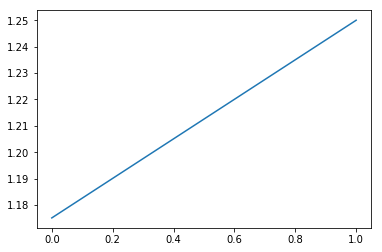

In [34]:

Q1,firstvalue=TDlambda(Q,2,3,0.1,0.1,0.9,R)

import matplotlib.pyplot as plt
plt.plot(firstvalue)
plt.show()

In [40]:
#get Q
Q=InitializeQdic(4)
#get R
R=InitializeR(4)

Q {'[1,2,3,4]': [1, 2, 3, 4], '[1,2,4,3]': [1, 2, 4, 3], '[1,3,2,4]': [1, 3, 2, 4], '[1,3,4,2]': [1, 3, 4, 2], '[1,4,2,3]': [1, 4, 2, 3], '[1,4,3,2]': [1, 4, 3, 2], '[2,1,3,4]': [2, 1, 3, 4], '[2,1,4,3]': [2, 1, 4, 3], '[2,3,1,4]': [2, 3, 1, 4], '[2,3,4,1]': [2, 3, 4, 1], '[2,4,1,3]': [2, 4, 1, 3], '[2,4,3,1]': [2, 4, 3, 1], '[3,1,2,4]': [3, 1, 2, 4], '[3,1,4,2]': [3, 1, 4, 2], '[3,2,1,4]': [3, 2, 1, 4], '[3,2,4,1]': [3, 2, 4, 1], '[3,4,1,2]': [3, 4, 1, 2], '[3,4,2,1]': [3, 4, 2, 1], '[4,1,2,3]': [4, 1, 2, 3], '[4,1,3,2]': [4, 1, 3, 2], '[4,2,1,3]': [4, 2, 1, 3], '[4,2,3,1]': [4, 2, 3, 1], '[4,3,1,2]': [4, 3, 1, 2], '[4,3,2,1]': [4, 3, 2, 1], '[0, 0, 0, 0]': {'O(1)': [2.4010272389783722, 2.5028221426812567, 3.559346377423595, 3.7259932499228725]}, '[4,0,0,0]': {'O(2)': [2.520174931734177, 2.5301300413230225, 4.185485836927208, 3.841630984245938], 'S(2,4,1)': [2.283376119570434, 2.078220151334342, 3.029958592726797, 3.5497184527449357]}, '[4,1,0,0]': {'S(3,4,1)': [1.5985833265917544, 2.

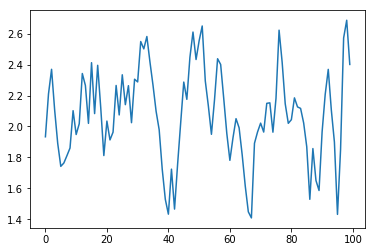

In [43]:
Q1,firstvalue=TDlambda(Q,100,4,0.2,0.3,0.9,R)

import matplotlib.pyplot as plt
plt.plot(firstvalue)
plt.show()